In [2]:
import numpy as np
from fidelity import *
from qiskit.quantum_info import state_fidelity

In [3]:
Nq = 3
Ns = 3000
Nep = 100
Nt = 10

Nl, dmodel, Nh = 2, 64, 4

pl = np.array([0.0, 0.1, 0.2, 0.3])
Np = len(pl)
qf = np.zeros((Np, Nt))
qf0 = np.zeros((Np, Nt))


dm_ref = np.load('noise_2/0.0/3_dm.npy')


for n in range(Np):
    p = pl[n]
    path = 'noise_2/{:.1f}'.format(p)
    dm_state = np.load('{}/{}_dm.npy'.format(path, Nq))

    for nt in range(Nt):
        dm_model = np.load('{}/{}_{}_{}_{}-{}-{}-{}_dm.npy'.format(path, Nq, Ns, nt, Nep, Nl, dmodel, Nh))
        qf[n, nt] = state_fidelity(dm_model, dm_state, validate=False)
        qf0[n, nt] = state_fidelity(dm_model, dm_ref, validate=False)
        

print(np.mean(qf, axis=1))
print(np.std(qf, axis=1))

qf0_m = np.mean(qf0, axis=1)
qf0_s = np.std(qf0, axis=1)

[0.96147264 1.07852655 0.98465529 0.99214864]
[0.03303827 0.05162308 0.0691284  0.03810144]


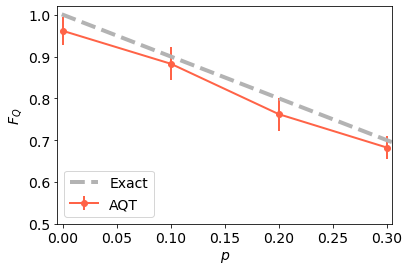

In [8]:
fig, ax = plt.subplots()
ax.plot([-1,1],[2,0], linestyle='--', color='0.7', linewidth=4, label='Exact')
ax.errorbar(pl, qf0_m, yerr=qf0_s, marker='.', markersize=12, linewidth=2, color='tomato',label='AQT')

ax.set_ybound(0.5,1.02)
ax.set_xbound(-0.005, 0.305)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('$p$',size=14)
ax.set_ylabel('$F_Q$',size=14)
ax.legend(loc='lower left', fontsize=14)

fig.savefig('figures/noise_2.pdf', dpi=300, bbox_inches="tight")